<a href="https://colab.research.google.com/github/eclipseeyo/practiceML/blob/main/%D0%94%D0%97_3%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [ ]:
data.drop(columns="Unnamed: 0", inplace=True)

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [ ]:
data.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


<Axes: >

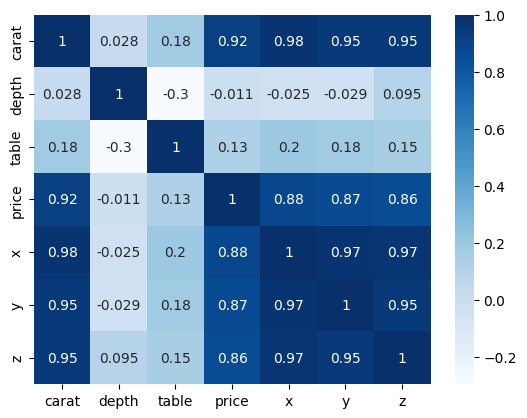

In [ ]:
import seaborn as sb
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [ ]:
data = pd.get_dummies(data, drop_first=True, dtype='int')

In [ ]:
data.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [ ]:
X = data.drop(columns='price')
y = data.price

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state = 42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score*

1.   Новый пункт
2.   Новый пункт

на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:


model = LinearRegression()
model.fit(Xtrain_scaled,ytrain)
pred = model.predict(Xtest_scaled)
pred_train = model.predict(Xtrain_scaled)
print(r2_score(ytest,pred))
print(r2_score(ytrain,pred_train))

0.9201866914388087
0.9195976267987521


### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [ ]:
pd.DataFrame({'feature' : X.columns, 'weight' : model.coef_})

,feature,weight
0,carat,5338.615671
1,depth,-90.173817
2,table,-60.332280
3,x,-1100.418850
4,y,-6.458917
5,z,-34.258945
6,cut_Good,170.602933
7,cut_Ideal,414.369515
8,cut_Premium,339.239204
9,cut_Very Good,310.654256


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

<Axes: >

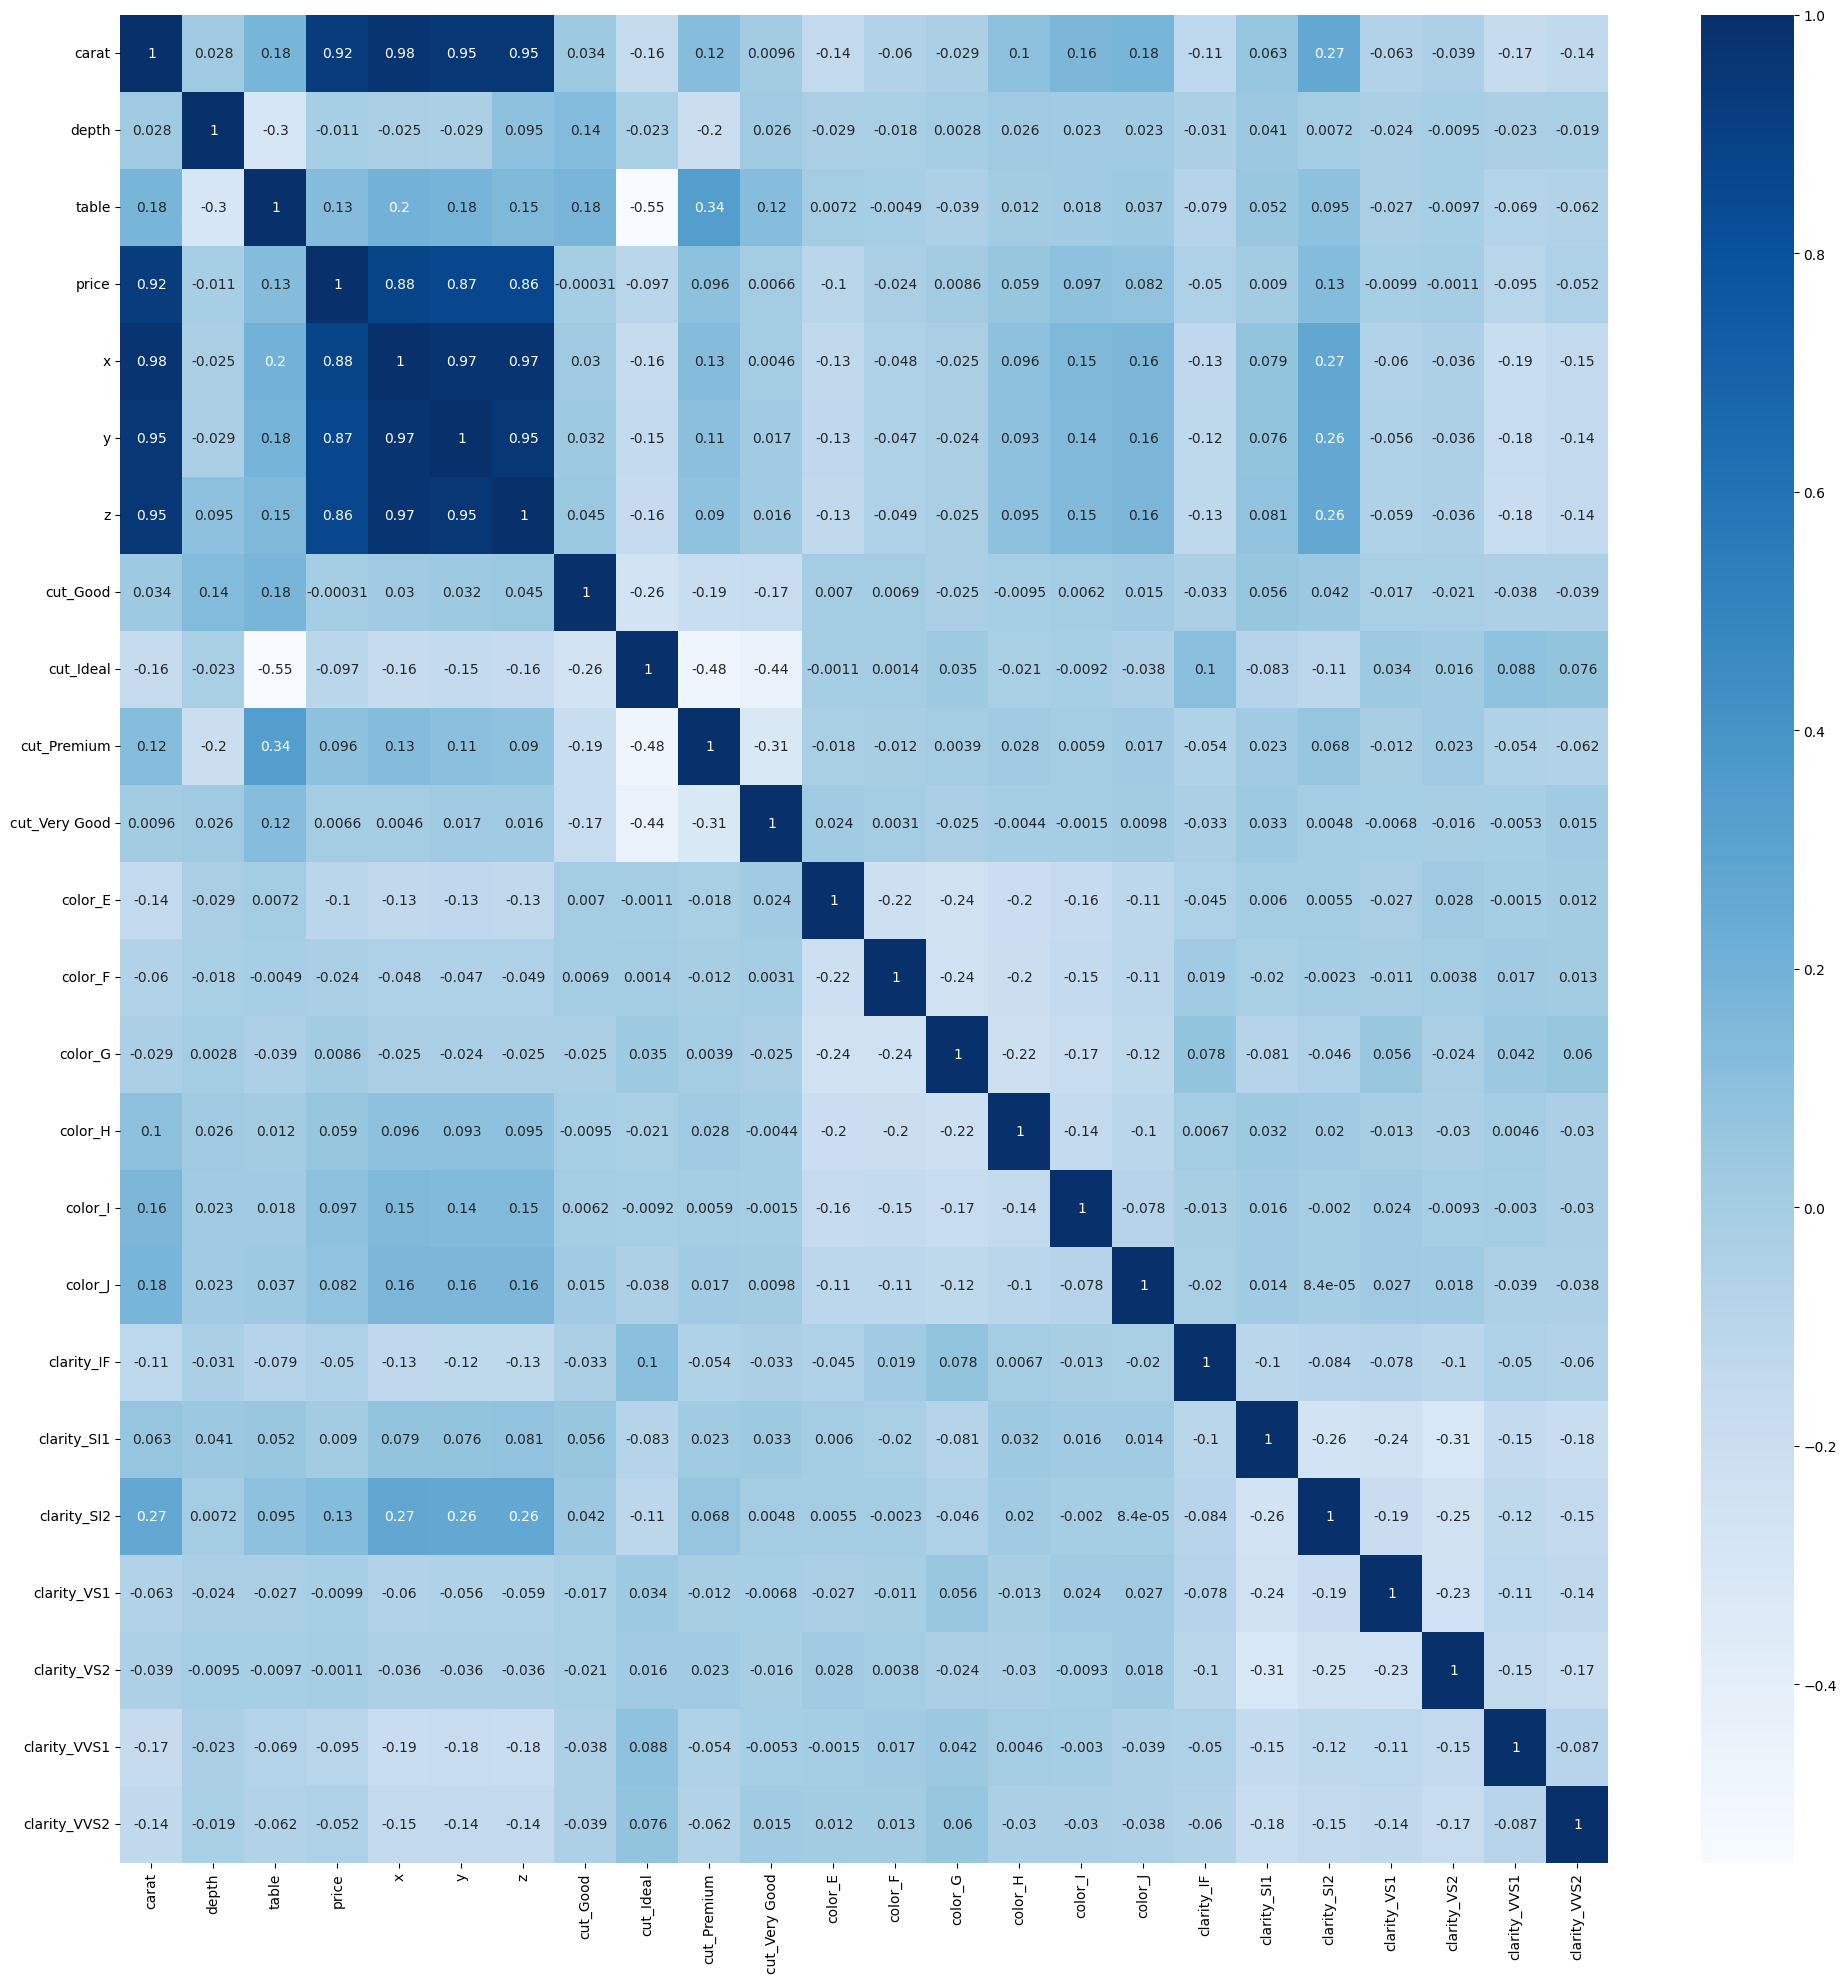

In [ ]:
fig, ax = plt.subplots(figsize=(24,24))
corr1 = data.select_dtypes(include=['float64', 'int64']).corr()
sb.heatmap(corr1, cmap="Blues", annot=True)

In [ ]:
Xtrain_scaled.drop(columns='table', inplace=True)
Xtest_scaled.drop(columns='table', inplace=True)
Xtrain_scaled.drop(columns='y', inplace=True)
Xtest_scaled.drop(columns='y', inplace=True)

model1 = LinearRegression()
model1.fit(Xtrain_scaled,ytrain)
pred = model1.predict(Xtest_scaled)
pred_train = model1.predict(Xtrain_scaled)
print(r2_score(ytest,pred))
print(r2_score(ytrain,pred_train))

0.920073847444683
0.9194706593763511


In [ ]:
0.9201866914388087 #test
0.9195976267987521 #train

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

pf = PolynomialFeatures(degree = 2)
pf.fit(Xtrain_scaled)
Xtrain_scaled = pf.transform(Xtrain_scaled)
Xtest_scaled = pf.transform(Xtest_scaled)

model2 = LinearRegression()
model2 = linear_model.Lasso(alpha=0.1)
model2.fit(Xtrain_scaled,ytrain)
pred = model2.predict(Xtest_scaled)
pred_train = model2.predict(Xtrain_scaled)
print(r2_score(ytest,pred))
print(r2_score(ytrain,pred_train))

0.9690628671268476
0.970029648459734


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.874e+09, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
model.coef_

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])